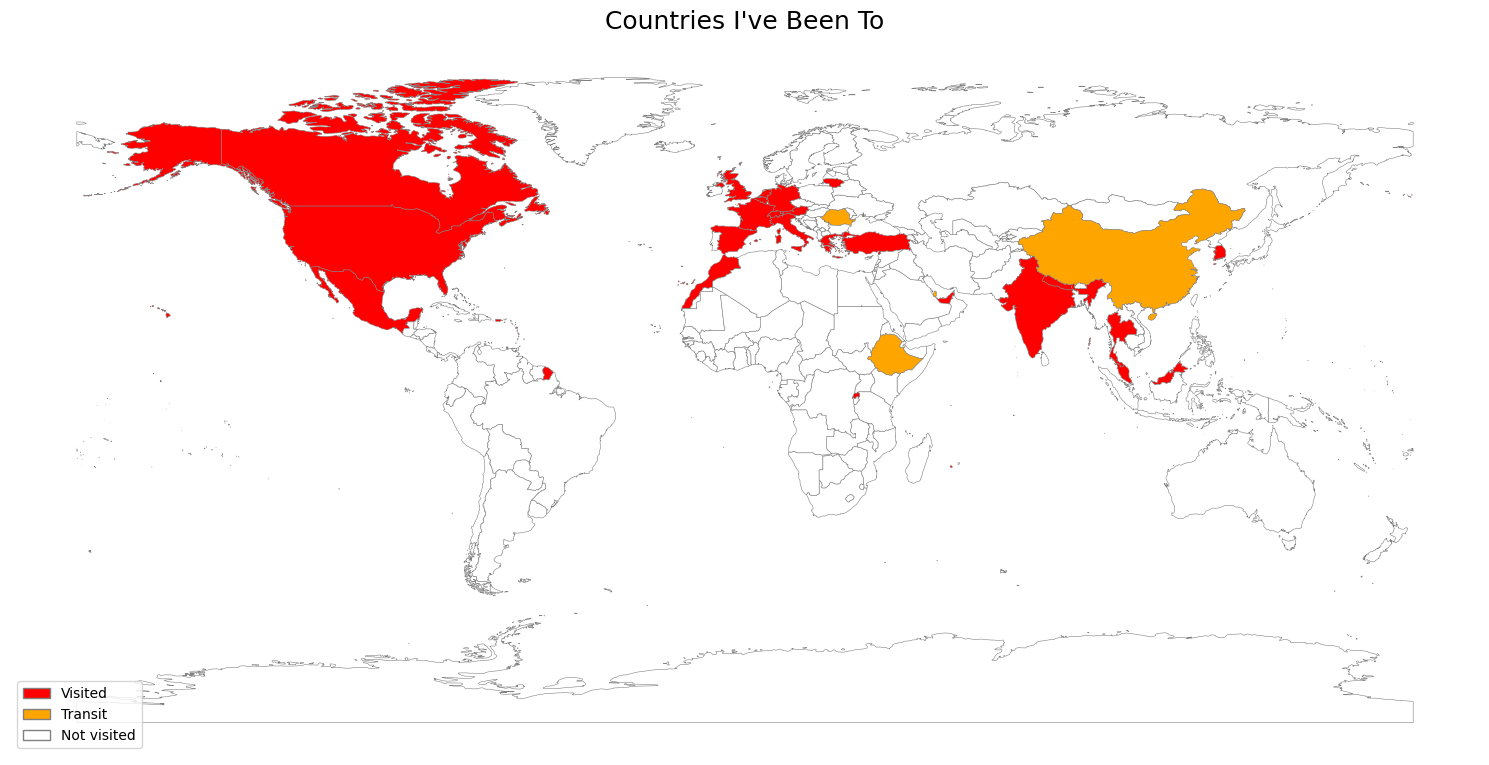

In [26]:
# pip install geopandas cartopy matplotlib pyogrio  # (pyogrio optional but faster)
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from cartopy.io import shapereader as shp

# --- Load Natural Earth: admin_0 countries ---
shp_path = shp.natural_earth(resolution="50m", category="cultural", name="admin_0_countries")
world = gpd.read_file(shp_path)

# Pick the name column that exists
CANDIDATE_NAME_COLS = ["NAME_EN", "ADMIN", "SOVEREIGNT", "NAME"]
name_col = next((c for c in CANDIDATE_NAME_COLS if c in world.columns), None)
if name_col is None:
    raise RuntimeError(f"No country name column found. Columns: {world.columns.tolist()}")

# --- Your lists ---
countries = [
    "United States", "Mexico", "Hong Kong", "United Kingdom", "Spain",
    "Netherlands", "France", "Italy", "Greece", "Turkey", "Germany",
    "Switzerland", "Lithuania", "India", "Thailand", "South Korea",
    "Nepal", "Belgium", "Vatican", "Rwanda", "Morocco", "Canada",
    "Austria", "United Arab Emirates", "Singapore", "Malaysia"
]
regions = ["Puerto Rico", "Hong Kong"]
transit = ["Romania", "People's Republic of China", "Qatar", "Ethiopia"]

# --- Normalize / alias to dataset names ---
ALIASES = {
    "United States": "United States of America",
    "USA": "United States of America",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "Vatican": "Vatican City",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Ivory Coast": "Côte d'Ivoire",
    # Turkey/Türkiye handling below
}

existing = set(world[name_col].tolist())

def to_dataset_name(x: str) -> str:
    t = ALIASES.get(x, x)
    # Handle Turkey/Türkiye rename
    if t in ("Turkey", "Türkiye"):
        if "Türkiye" in existing:
            t = "Türkiye"
        elif "Turkey" in existing:
            t = "Turkey"
    return t

countries_ds = {to_dataset_name(x) for x in countries}
regions_ds   = {to_dataset_name(x) for x in regions}
transit_ds   = {to_dataset_name(x) for x in transit}

# Warn on unmatched to help tweak aliases if needed
for label, s in {"countries": countries_ds, "regions": regions_ds, "transit": transit_ds}.items():
    missing = sorted(s - existing)
    if missing:
        print(f"[WARN] {label} not found in dataset: {missing}")

# Categorize
def assign_category(name: str) -> int:
    if name in countries_ds or name in regions_ds:
        return 1   # visited
    elif name in transit_ds:
        return 2   # transit
    return 3       # not visited

world["category"] = world[name_col].apply(assign_category)

# Plot
COLOR_MAP = {1: "red", 2: "orange", 3: "white"}
LABELS = {1: "Visited", 2: "Transit", 3: "Not visited"}

fig, ax = plt.subplots(figsize=(15, 9))
world.plot(ax=ax, color=world["category"].map(COLOR_MAP), edgecolor="gray", linewidth=0.4)
ax.set_title("Countries I've Been To", fontsize=18, pad=12)
ax.set_axis_off()

handles = [Patch(facecolor=COLOR_MAP[i], edgecolor="gray", label=LABELS[i]) for i in [1, 2, 3]]
ax.legend(handles=handles, loc="lower left")
plt.tight_layout()
plt.show()

In [18]:
print(world.columns) 



Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry', 'category'],
      dtype='object', length=170)


In [21]:
# If 'NAME' exists
if "NAME" in world.columns:
    countries = sorted(world["NAME"].unique())
elif "NAME_EN" in world.columns:
    countries = sorted(world["NAME_EN"].unique())
else:
    countries = sorted(world.iloc[:,0].unique())  # fallback: first column

for c in countries:
    print(c)

Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barb.
Argentina
Armenia
Aruba
Ashmore and Cartier Is.
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herz.
Botswana
Br. Indian Ocean Ter.
Brazil
British Virgin Is.
Brunei
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Is.
Central African Rep.
Chad
Chile
China
Colombia
Comoros
Congo
Cook Is.
Costa Rica
Croatia
Cuba
Curaçao
Cyprus
Czechia
Côte d'Ivoire
Dem. Rep. Congo
Denmark
Djibouti
Dominica
Dominican Rep.
Ecuador
Egypt
El Salvador
Eq. Guinea
Eritrea
Estonia
Ethiopia
Faeroe Is.
Falkland Is.
Fiji
Finland
Fr. Polynesia
Fr. S. Antarctic Lands
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Heard I. and McDonald Is.
Honduras
Hong Kong
Hungary
Iceland
India
Indian Ocean Ter.
Indonesia
Iran
Iraq
Ireland
Isle of Man
Israel
